## Problem Statement

Traffic sign classification is an important task for self driving cars.

In this project, a Deep Network known as LeNet will be used for traffic sign images classification.

The dataset contains 43 different classes of images. 

Classes are as listed below: 

. ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)') ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)') ( 4, b'Speed limit (70km/h)') 
( 5, b'Speed limit (80km/h)') ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)') ( 8, b'Speed limit (120km/h)') ( 9, b'No passing') 
(10, b'No passing for vehicles over 3.5 metric tons') (11, b'Right-of-way at the next intersection') (12, b'Priority road') (13, b'Yield') (14, b'Stop') 
(15, b'No vehicles') (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
(18, b'General caution') (19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right') (21, b'Double curve')
(22, b'Bumpy road') (23, b'Slippery road')
(24, b'Road narrows on the right') (25, b'Road work')
(26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
(29, b'Bicycles crossing') (30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits') (33, b'Turn right ahead')
(34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
(37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
(40, b'Roundabout mandatory') (41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')


## Load Data

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [154]:
with open("C:/Users/Akshay DS and AI/Desktop/Projects/P74-Project-5/Project 5/traffic-signs-data/train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("C:/Users/Akshay DS and AI/Desktop/Projects/P74-Project-5/Project 5/traffic-signs-data/valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("C:/Users/Akshay DS and AI/Desktop/Projects/P74-Project-5/Project 5/traffic-signs-data/test.p",mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [155]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [156]:
X_train.shape

(34799, 32, 32, 3)

In [157]:
y_train.shape

(34799,)

In [158]:
X_validation.shape

(4410, 32, 32, 3)

In [159]:
y_validation.shape

(4410,)

In [160]:
X_test.shape

(12630, 32, 32, 3)

In [161]:
y_test.shape

(12630,)

## Image Exploration

37

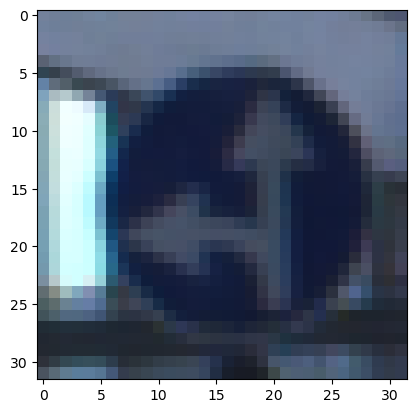

In [162]:
i = 5000


plt.imshow(X_train[i])
y_train[i]

38

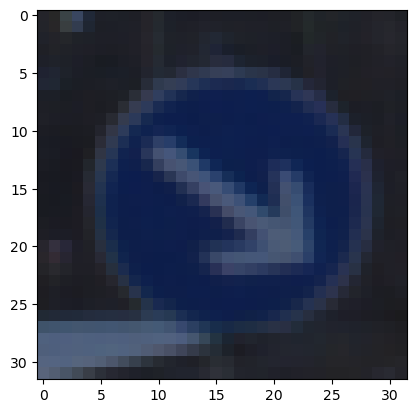

In [163]:
i = 2000


plt.imshow(X_validation[i])
y_validation[i]

34

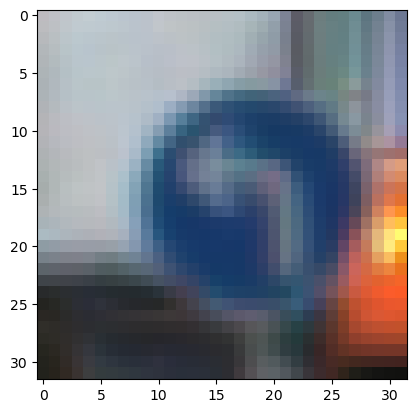

In [164]:
i = 2000


plt.imshow(X_test[i])
y_test[i]

In [165]:
from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train,y_train)

In [166]:
X_train_grey = np.sum(X_train/3,axis=3,keepdims=True)
X_test_grey = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_grey = np.sum(X_validation/3,axis=3,keepdims=True)

In [167]:
X_train_grey.shape

(34799, 32, 32, 1)

In [168]:
X_test_grey.shape

(12630, 32, 32, 1)

In [169]:
X_validation_grey.shape

(4410, 32, 32, 1)

In [170]:
X_train_grey_norm = (X_train_grey -128)/128
X_validation_grey_norm = (X_validation_grey -128)/128
X_test_grey_norm = (X_test_grey -128)/128

In [171]:
X_train_grey_norm

array([[[[-0.55989583],
         [-0.125     ],
         [-0.56510417],
         ...,
         [ 0.98697917],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[-0.4296875 ],
         [-0.13802083],
         [-0.58072917],
         ...,
         [ 0.98697917],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[-0.27604167],
         [-0.1328125 ],
         [-0.59375   ],
         ...,
         [ 0.98958333],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[ 0.26041667],
         [-0.4375    ],
         [-0.64583333],
         ...,
         [-0.40364583],
         [-0.4375    ],
         [-0.51041667]],

        [[ 0.22135417],
         [-0.4609375 ],
         [-0.64322917],
         ...,
         [-0.40625   ],
         [-0.41927083],
         [-0.4453125 ]],

        [[ 0.16666667],
         [-0.45833333],
         [-0.640625  ],
         ...,
         [-0.5390625 ],
         [-0.5390625 ],
         [-0.53645833]]],


       [[[-0.00260417],


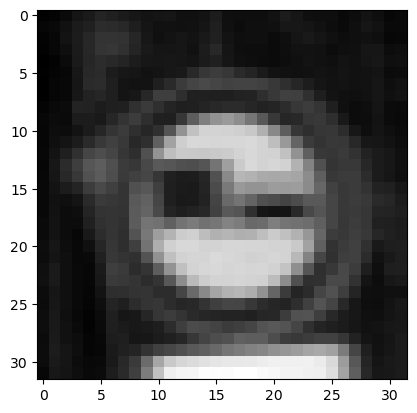

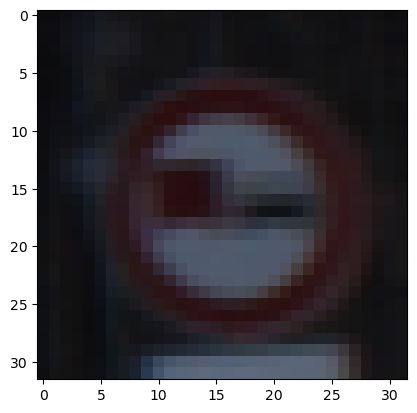

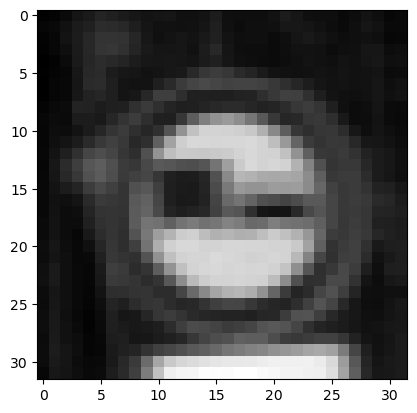

In [172]:
i = 200
plt.imshow(X_train_grey[i].squeeze(),cmap ='gray')

plt.figure()
plt.imshow(X_train[i])

plt.figure()
plt.imshow(X_train_grey_norm[i].squeeze(),cmap ='gray')

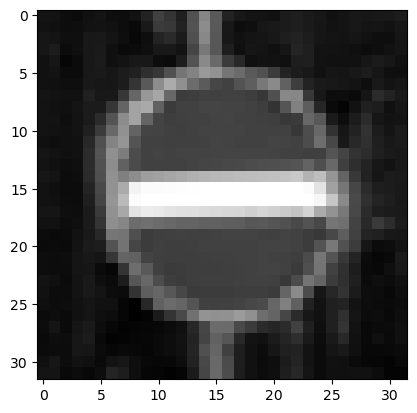

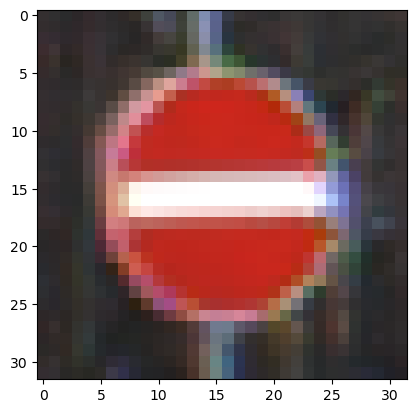

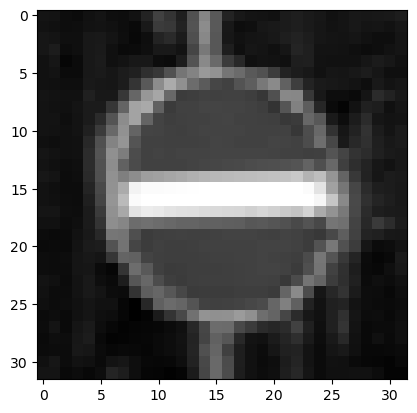

In [173]:
i = 200
plt.imshow(X_test_grey[i].squeeze(),cmap ='gray')

plt.figure()
plt.imshow(X_test[i])

plt.figure()
plt.imshow(X_test_grey_norm[i].squeeze(),cmap ='gray')

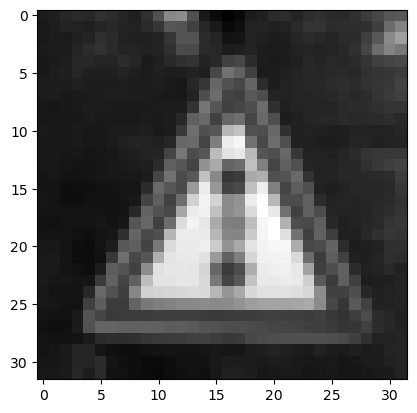

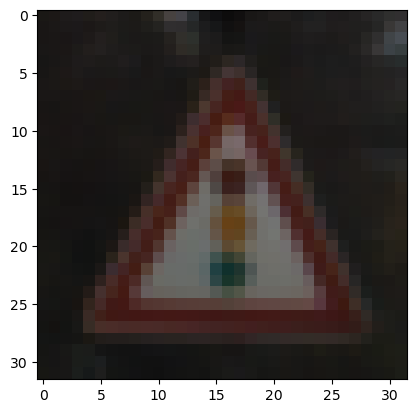

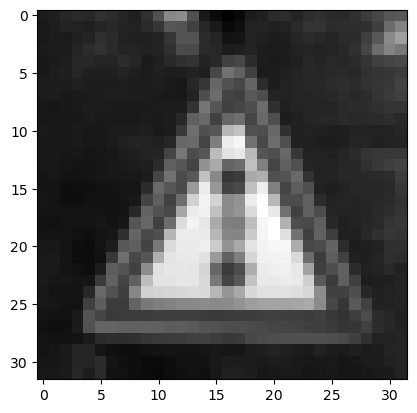

In [174]:
i = 200
plt.imshow(X_validation_grey[i].squeeze(),cmap ='gray')

plt.figure()
plt.imshow(X_validation[i])

plt.figure()
plt.imshow(X_validation_grey_norm[i].squeeze(),cmap ='gray')

## Model Building

•	STEP 1: THE FIRST CONVOLUTIONAL LAYER #1

•	Input = 32x32x1 

•	Output = 28x28x6 

•	Output = (Input-filter+1)/Stride* => (32-5+1)/1=28

•	Used a 5x5 Filter with input depth of 3 and output depth of 6 


•	Apply a RELU Activation function to the output 

•	pooling for input, Input = 28x28x6 and Output = 14x14x6 

•	STEP 2: THE SECOND CONVOLUTIONAL LAYER #2

•	Input = 14x14x6 

•	Output = 10x10x16 

•	Layer 2: Convolutional layer with Output = 10x10x16 

•	Output = (Input-filter+1)/strides => 10 = 14-5+1/1 

•	Apply a RELU Activation function to the output 

•	Pooling with Input = 10x10x16 and Output = 5x5x16 

•	STEP 3: FLATTENING THE NETWORK

•	Flatten the network with Input = 5x5x16 and Output = 400 

•	STEP 4: FULLY CONNECTED LAYER

•	Layer 3: Fully Connected layer with Input = 400 and Output = 120 

•	Apply a RELU Activation function to the output 

•	STEP 5: ANOTHER FULLY CONNECTED LAYER

•	Layer 4: Fully Connected Layer with Input = 120 and Output = 84 

•	Apply a RELU Activation function to the output 

•	STEP 6: FULLY CONNECTED LAYER

•	Layer 5: Fully Connected layer with Input = 84 and Output = 43
	


In [175]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout

from keras.optimizers import Adam
#from keras.callbacks import TensorBoard

In [176]:
cnn = Sequential()
cnn.add(Conv2D(filters= 6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters= 16,kernel_size=(6,6),activation='relu'))
cnn.add(MaxPooling2D())
        
cnn.add(Flatten())

cnn.add(Dense(units=120,activation='relu'))
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=43,activation='softmax'))



In [177]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [178]:
history = cnn.fit(X_train_grey_norm,y_train,batch_size=500,epochs=100,verbose=1,validation_data=(X_validation_grey_norm,y_validation))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1180 - loss: 3.4114 - val_accuracy: 0.3469 - val_loss: 2.4328
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5029 - loss: 1.7969 - val_accuracy: 0.6147 - val_loss: 1.3338
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7426 - loss: 0.9167 - val_accuracy: 0.7442 - val_loss: 0.9841
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8315 - loss: 0.6172 - val_accuracy: 0.7757 - val_loss: 0.8189
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8796 - loss: 0.4586 - val_accuracy: 0.8179 - val_loss: 0.6796
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9015 - loss: 0.3770 - val_accuracy: 0.8227 - val_loss: 0.6709
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9192 - loss: 0.3071 - val_accuracy: 0.8358 - val_loss: 0.6030
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9343 - loss: 0.2606 - val_accuracy: 0.

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.8921 - val_loss: 0.7916
Epoch 52/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9979 - loss: 0.0087 - val_accuracy: 0.8832 - val_loss: 0.8142
Epoch 53/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.8918 - val_loss: 0.7715
Epoch 54/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.8837 - val_loss: 0.8276
Epoch 55/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.8615 - val_loss: 0.9183
Epoch 56/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.8810 - val_loss: 0.8209
Epoch 57/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.8828 - val_loss: 0.8241
Epoch 58/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.8955 

## Model Evalution

In [179]:
score = cnn.evaluate(X_test_grey_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 1.4369
Test Accuracy:0.8997624516487122


In [180]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [181]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

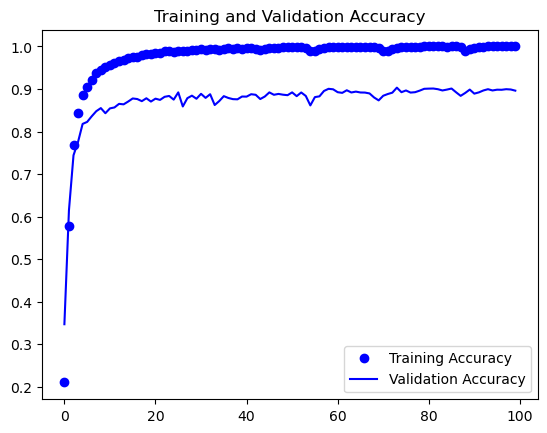

In [182]:
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

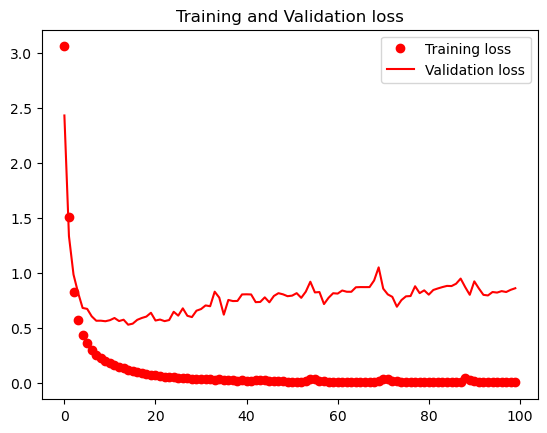

In [183]:


plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [184]:
prediction = cnn.predict(X_test_grey_norm)
predict_classes = np.argmax(prediction, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [185]:
predict_classes

array([16,  1, 38, ...,  8,  7, 10], dtype=int64)

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predict_classes)
cm

array([[ 50,   4,   0, ...,   0,   0,   0],
       [  2, 683,  17, ...,   0,   0,   0],
       [  0,  27, 684, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  42,   0,   0],
       [  0,   0,   0, ...,   0,  39,   0],
       [  0,   0,   0, ...,   0,   2,  62]], dtype=int64)

<Axes: >

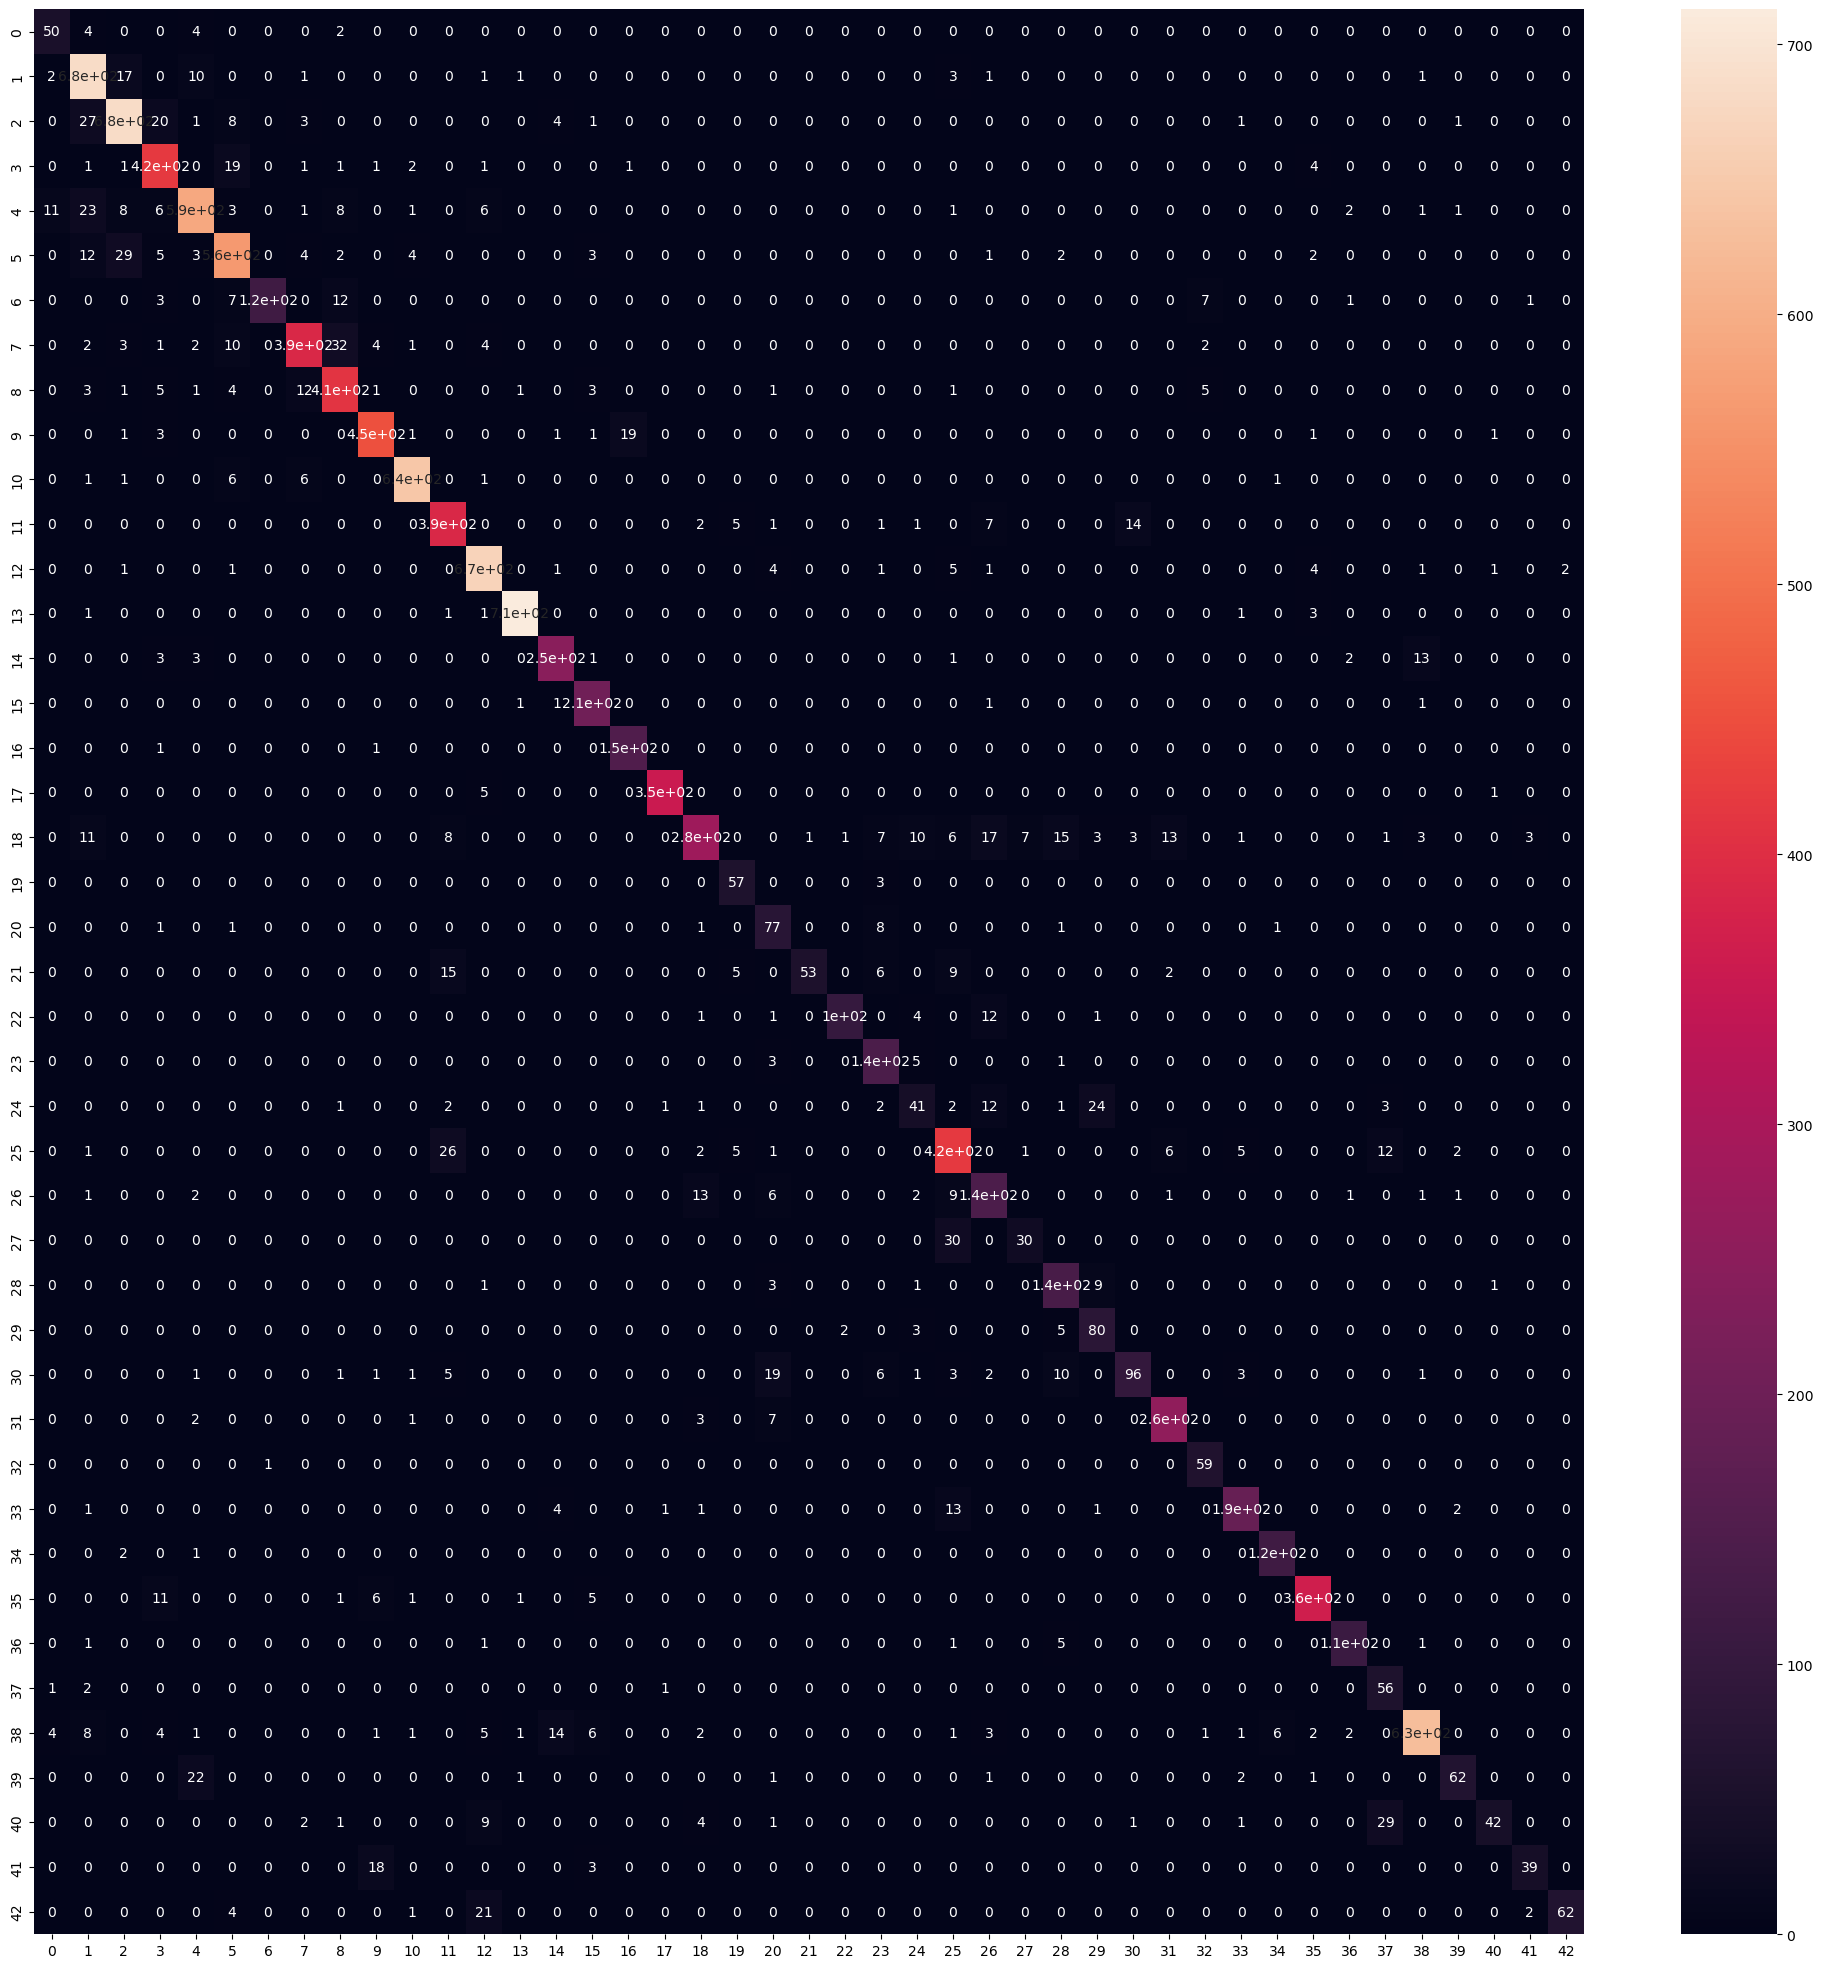

In [187]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

In [188]:
from sklearn.metrics import classification_report

labels =np.arange(44)
report = classification_report(y_test, predict_classes, labels=labels)



C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akshay DS and AI\anac

In [189]:
report

'              precision    recall  f1-score   support\n\n           0       0.74      0.83      0.78        60\n           1       0.87      0.95      0.91       720\n           2       0.91      0.91      0.91       750\n           3       0.87      0.93      0.90       450\n           4       0.92      0.89      0.90       660\n           5       0.90      0.89      0.90       630\n           6       0.99      0.79      0.88       150\n           7       0.93      0.86      0.90       450\n           8       0.87      0.92      0.89       450\n           9       0.93      0.94      0.94       480\n          10       0.98      0.98      0.98       660\n          11       0.87      0.93      0.90       420\n          12       0.92      0.97      0.94       690\n          13       0.99      0.99      0.99       720\n          14       0.91      0.91      0.91       270\n          15       0.90      0.98      0.94       210\n          16       0.88      0.99      0.93       150\n       

In [190]:
import re

report_str = report  # The classification report string you provided

# Remove leading and trailing whitespace
report_str = report_str.strip()

# Split the string into lines
lines = report_str.split('\n')

# Extract the header line
header_line = lines[0]

# Extract the data lines
data_lines = lines[2:]  # Skip the header and empty line

# Initialize lists to hold the parsed data
parsed_data = []
for line in data_lines:
    # Split the line into columns based on whitespace
    cols = re.split(r'\s{2,}', line.strip())
    if len(cols) == 5:  # Regular line with class and metrics
        class_name, precision, recall, f1_score, support = cols
        parsed_data.append([class_name, precision, recall, f1_score, support])
    elif len(cols) == 6:  # Line with averages
        avg_type, precision, recall, f1_score, _, support = cols
        parsed_data.append([avg_type, precision, recall, f1_score, support])

# Create a DataFrame from the parsed data
report_df = pd.DataFrame(parsed_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Convert numeric columns to appropriate types
report_df['Precision'] = pd.to_numeric(report_df['Precision'], errors='coerce')
report_df['Recall'] = pd.to_numeric(report_df['Recall'], errors='coerce')
report_df['F1-Score'] = pd.to_numeric(report_df['F1-Score'], errors='coerce')
report_df['Support'] = pd.to_numeric(report_df['Support'], errors='coerce')

print(report_df)


           Class  Precision  Recall  F1-Score  Support
0              0       0.74    0.83      0.78       60
1              1       0.87    0.95      0.91      720
2              2       0.91    0.91      0.91      750
3              3       0.87    0.93      0.90      450
4              4       0.92    0.89      0.90      660
5              5       0.90    0.89      0.90      630
6              6       0.99    0.79      0.88      150
7              7       0.93    0.86      0.90      450
8              8       0.87    0.92      0.89      450
9              9       0.93    0.94      0.94      480
10            10       0.98    0.98      0.98      660
11            11       0.87    0.93      0.90      420
12            12       0.92    0.97      0.94      690
13            13       0.99    0.99      0.99      720
14            14       0.91    0.91      0.91      270
15            15       0.90    0.98      0.94      210
16            16       0.88    0.99      0.93      150
17        

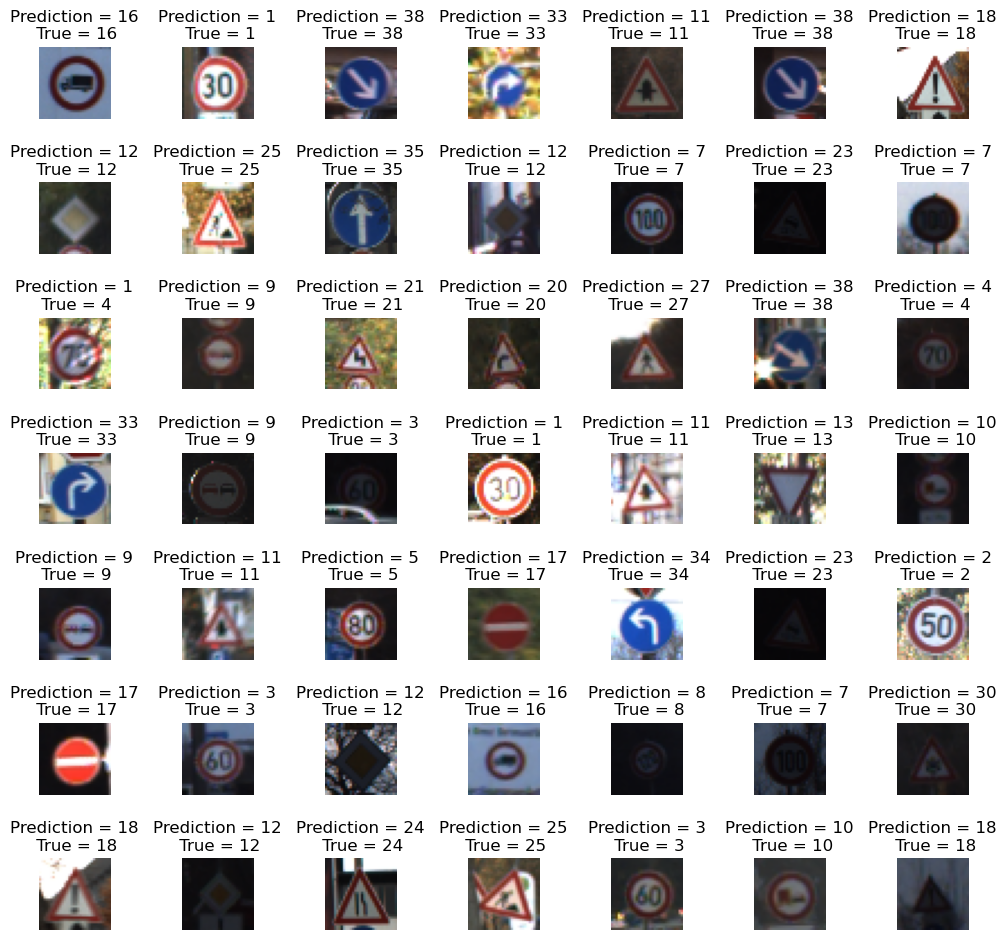

In [191]:
L =7
W = 7

fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predict_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)